In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from bokeh.plotting import figure, show, output_file

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
suggested = pd.read_csv(os.path.join(project_root,'exp_result', 'exp_1_Dilyar.csv'))
baseline = pd.read_csv(os.path.join(project_root,'exp_result', 'exp_1-baseline_Dilyar.csv'))


In [320]:
print(project_root)
print(os.path.join(project_root,'exp_result', 'exp_1_Dilyar.csv'))

/home/botgod/Git/Hub/seminarcode
/home/botgod/Git/Hub/seminarcode/exp_result/exp_1_Dilyar.csv


In [321]:
suggested.columns

Index(['test_path', ' alpha', ' beta', ' total_weighted_sum',
       ' total_computation_time', ' total_pred_time', ' total_opti_time',
       ' self.precision*100 '],
      dtype='object')

In [322]:
baseline.columns

Index(['Baseline test_path', ' total_weighted_sum',
       ' total_computation_time '],
      dtype='object')

In [323]:
# print the unique values in the column test_path in suggested dataframe
print(suggested['test_path'].unique())

['./sample_data/artificial/testlog_0806_1_90.csv'
 './sample_data/artificial/testlog_0806_1_40.csv'
 './sample_data/artificial/testlog_0806_1_60.csv'
 './sample_data/artificial/testlog_0806_1_80.csv'
 './sample_data/artificial/testlog_0806_1_100.csv'
 './sample_data/artificial/testlog_0806_1_120.csv'
 './sample_data/artificial/testlog_0806_1_140.csv']


In [324]:
# create a new df for each unique value in the column test_path
# and append it to the list
suggested_list = {}
for i in suggested['test_path'].unique():
    suggested_list[i]= suggested[suggested['test_path'] == i]
baseline_list = {}
for i in baseline['Baseline test_path'].unique():
    baseline_list[i]= baseline[baseline['Baseline test_path'] == i]


In [325]:
def compare_methods(suggested, baseline):
  percentage_change = (suggested - baseline) / baseline * 100
  if percentage_change > 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    return f"{-percentage_change:.2f}%"
  elif percentage_change < 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    return f"{-percentage_change:.2f}%"
  else:
    #print("suggested and baseline are equally good")
    return f"0%"


In [326]:
def compare_methods_int(suggested, baseline):
  percentage_change = (suggested - baseline) / baseline * 100
  if percentage_change > 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    # return only first two digts of the percentage change in int
    return float(-percentage_change)
  elif percentage_change < 0:
    #print(f" suggested is {-percentage_change:.2f}% better than baseline")
    return float(-percentage_change)
  else:
    #print("suggested and baseline are equally good")
    return 0

In [327]:
#rename the keys of the suggested_list
suggested_list = {k.split('/')[-1].split('.')[0].split('_')[-1]: v for k, v in suggested_list.items()}

In [328]:
baseline_list = {k.split('/')[-1].split('.')[0].split('_')[-1]: v for k, v in baseline_list.items()}

In [329]:
print(baseline_list.keys())

dict_keys(['90', '40', '60', '80', '100', '120', '140'])


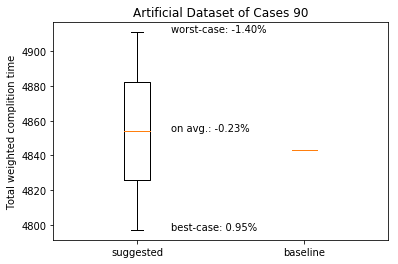

best case: 

worst case: 

avg case: 



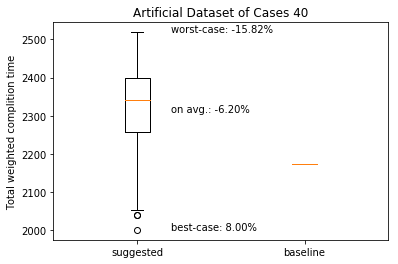

best case: 

worst case: 

avg case: 



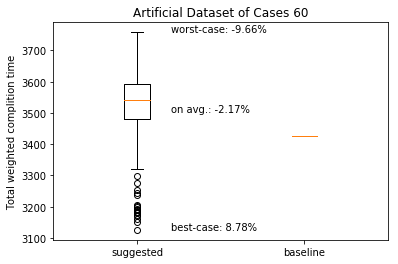

best case: 

worst case: 

avg case: 



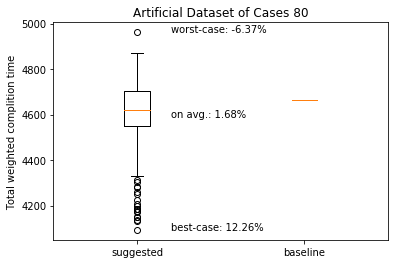

best case: 

worst case: 

avg case: 



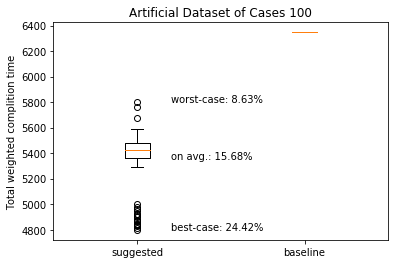

best case: 

worst case: 

avg case: 



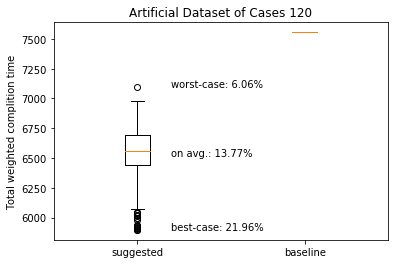

best case: 

worst case: 

avg case: 



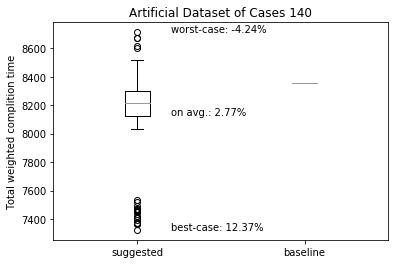

best case: 

worst case: 

avg case: 



In [330]:
best_case = {}
worst_case = {}
avg_case = {}
# for each key value pair in the dictionary, create a boxplot
for key, value in suggested_list.items():
    plt.figure()
    plt.title('Artificial Dataset of Cases' + " " + key)
    plt.boxplot([value[' total_weighted_sum'], baseline_list[key][' total_weighted_sum']])
    
    plt.xticks([1,2], ['suggested', 'baseline'])
    # name the y column to Total weighted complition time
    plt.ylabel('Total weighted complition time')
    # add text to the botom of the plot
    plt.text(1.2, value[' total_weighted_sum'].min(), 'best-case: ' + compare_methods(value[' total_weighted_sum'].min(), float(baseline_list[key][' total_weighted_sum'])))

    plt.text(1.2, value[' total_weighted_sum'].max(), 'worst-case: ' + compare_methods(value[' total_weighted_sum'].max(), float(baseline_list[key][' total_weighted_sum'])))

    plt.text(1.2, value[' total_weighted_sum'].mean(), 'on avg.: ' + compare_methods(value[' total_weighted_sum'].mean(), float(baseline_list[key][' total_weighted_sum'])))
    # save the plot
    plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'artifical', key + '.png'))
    plt.show()
    
    
    # calculate the best case and the worst case for the suggested incomparison to baseline in terms of percentage
    print('best case: \n')
    best_case[key] = compare_methods_int(value[' total_weighted_sum'].min(), float(baseline_list[key][' total_weighted_sum']))
    print('worst case: \n')
    worst_case[key] = compare_methods_int(value[' total_weighted_sum'].max(), float(baseline_list[key][' total_weighted_sum']))
    print('avg case: \n')
    avg_case[key] = compare_methods_int(value[' total_weighted_sum'].mean(), float(baseline_list[key][' total_weighted_sum']))
    
    #best_case = (value[' total_weighted_sum'].min() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    #worst_case = (value[' total_weighted_sum'].max() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    #avg_case = (value[' total_weighted_sum'].mean() - baseline_list[key][' total_weighted_sum']) / baseline_list[key][' total_weighted_sum'] * 100
    #print('best case: ', best_case)
    #print('worst case: ', worst_case)
    #print('avg case: ', avg_case)
    # print the alpha and beta values for the best case, worst case 
    
    #print('best case alpha: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].min()][' alpha'].values[0])
    #print('best case beta: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].min()][' beta'].values[0])
    #print('worst case alpha: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].max()][' alpha'].values[0])
    #print('worst case beta: ', value[value[' total_weighted_sum'] == value[' total_weighted_sum'].max()][' beta'].values[0])
    
    

In [331]:
# create box plots from the column total_weighted_sum in the dataframe suggested where the test path is the same as the one in the baseline dataframe
#plt.boxplot(suggested[' total_weighted_sum'])
#plt.show()

In [332]:
print(worst_case)

{'90': -1.4040883749741895, '40': -15.816091954022987, '60': -9.65859352203093, '80': -6.366559485530547, '100': 8.632640201638312, '120': 6.0614081524616195, '140': -4.235463029432879}


In [333]:

# add data points to each xtick from ['40', '60', '80', '100', '120', '140'] 
xticks = ['40', '60', '80', '100', '120', '140']
worst_case_line = []
best_case_line = []
avg_case_line = []
for i in xticks:
    worst_case_line.append(worst_case[i])
    best_case_line.append(best_case[i])
    avg_case_line.append(avg_case[i])


In [334]:
print(worst_case_line)
print(best_case_line)
print(avg_case_line)

[-15.816091954022987, -9.65859352203093, -6.366559485530547, 8.632640201638312, 6.0614081524616195, -4.235463029432879]
[8.0, 8.783192296469215, 12.261521972132904, 24.41713925645873, 21.95606140815246, 12.371380713089255]
[-6.1989824759751375, -2.1669768042593316, 1.676418392985782, 15.683912320390048, 13.771381336295551, 2.76783998054284]


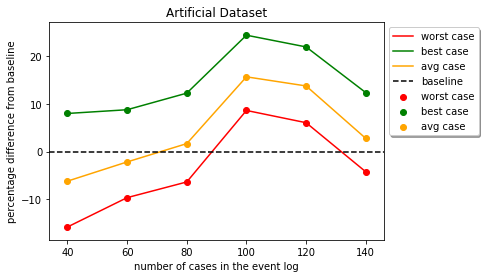

In [335]:
# create a line plot for the best case, worst case and average case
plt.figure()
plt.title('Artificial Dataset')

plt.plot(xticks, worst_case_line, label='worst case', color='red')
plt.plot(xticks, best_case_line, label='best case', color='green')
plt.plot(xticks, avg_case_line, label='avg case', color='orange')

plt.scatter(xticks, worst_case_line, label='worst case', color='red')
plt.scatter(xticks, best_case_line, label='best case', color='green')
plt.scatter(xticks, avg_case_line, label='avg case', color='orange')

# plot a line along side y=0 with label 'baseline'
plt.axhline(y=0, color='black', linestyle='--', label='baseline')

plt.xlabel('number of cases in the event log')
plt.ylabel('percentage difference from baseline')
plt.legend(shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'artifical', 'lineplot.png'))
plt.show()


# Replication of the Experiments on BPIC12 

In [336]:
# import csv file with the results of the baseline
baseline_real = pd.read_csv(os.path.join(project_root, 'exp_result', 'exp_3-baseline_Dilyar.csv'))
# import csv file with the results of the suggested
suggested_real = pd.read_csv(os.path.join(project_root, 'exp_result', 'exp_3_Dilyar.csv'))

In [337]:
# add the column 'date' to the dataframe suggested_real and baseline_real
baseline_real['date'] = baseline_real['Baseline test_path real'].apply(lambda x: x.split('_')[-1].split('.')[0])
suggested_real['date'] = suggested_real['test_path'].apply(lambda x: x.split('_')[-1].split('.')[0])


# concat number of cases column with date column in baseline_new_real 
baseline_real['date_case'] = baseline_real['date']+ '( ' + baseline_real[' num_cases'].astype(str) + ')'  

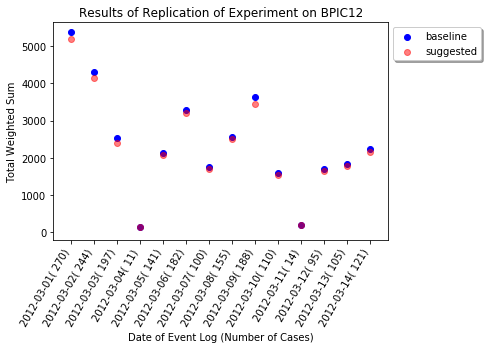

In [338]:
# plot baseline_real and suggested_real in a scatter plot with the x-axis being test path and the y-axis being total_weighted_sum
plt.figure()
plt.title('Results of Replication of Experiment on BPIC12')
plt.scatter(baseline_real['date'], baseline_real[' total_weighted_sum'], label='baseline', color='blue')
plt.scatter(suggested_real['date'], suggested_real[' total_weighted_sum'], label='suggested', color='red', alpha=0.5)
plt.xlabel('Date of Event Log (Number of Cases)')
plt.ylabel('Total Weighted Sum')
# rotate the xticks by 90 degrees
plt.xticks(rotation=60)
# shift xticks labels to the left by 0.5
plt.xticks(np.arange(len(baseline_real['date'])), baseline_real['date_case'], ha='right')
plt.legend(shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'real', 'scatterplot.png'))
plt.show()


In [339]:
suggested_real.columns

Index(['test_path', ' alpha', ' beta', ' total_weighted_sum',
       ' total_computation_time', ' total_pred_time', ' total_opti_time',
       ' self.precision*100 ', 'date'],
      dtype='object')

In [340]:
baseline_real.columns

Index(['Baseline test_path real', ' num_cases', ' avg_weight',
       ' total_weighted_sum', ' total_computation_time ', 'date', 'date_case'],
      dtype='object')

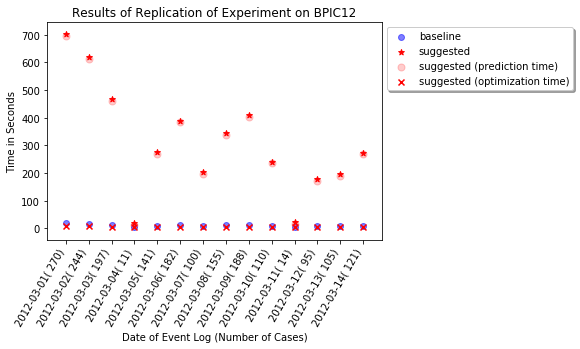

In [341]:
# plot baseline_real and suggested_real in a scatter plot with the x-axis being test path and the y-axis being time 
plt.figure()
plt.title('Results of Replication of Experiment on BPIC12')
plt.scatter(baseline_real['date'], baseline_real[' total_computation_time '], label='baseline', color='blue', alpha=0.5)
plt.scatter(suggested_real['date'], suggested_real[' total_computation_time'], label='suggested', color='red', marker='*')
plt.scatter(suggested_real['date'], suggested_real[' total_pred_time'], label='suggested (prediction time)', color='red', marker='o', s=50, alpha=0.2)
plt.scatter(suggested_real['date'], suggested_real[' total_opti_time'], label='suggested (optimization time)', color='red', marker='x')

plt.xlabel('Date of Event Log (Number of Cases)')
plt.ylabel('Time in Seconds')
# rotate the xticks by 90 degrees
plt.xticks(rotation=60)
# shift xticks labels to the left by 0.5
plt.xticks(np.arange(len(baseline_real['date'])), baseline_real['date_case'], ha='right')
plt.legend(shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'real', 'scatterplot_time.png'))
plt.show()

# Evaluation on new data BPIC17

In [342]:
# import csv file with the results of the baseline
baseline_new_real = pd.read_csv(os.path.join(project_root, 'exp_result', 'exp_4-baseline_Dilyar_test.csv'))
# import csv file with the results of the suggested
suggested_new_real = pd.read_csv(os.path.join(project_root, 'exp_result', 'exp_4_Dilyar_test.csv'))

In [343]:
# add the column 'date' to the dataframe suggested_real and baseline_real
baseline_new_real['date'] = baseline_new_real['Baseline test_path real'].apply(lambda x: x.split('_')[-1].split('.')[0])
suggested_new_real['date'] = suggested_new_real['test_path'].apply(lambda x: x.split('_')[-1].split('.')[0])

# concat number of cases column with date column in baseline_new_real 
baseline_new_real['date_case'] = baseline_new_real['date']+ '( ' + baseline_new_real[' num_cases'].astype(str) + ')'  


In [344]:
baseline_new_real.head()

,Baseline test_path real,num_cases,avg_weight,total_weighted_sum,total_computation_time,date,date_case
0,./sample_data/real_Dilyar/tests/modi_assignmen...,295,2.464416,5388,38.862630,2016-07-04,2016-07-04( 295)
1,./sample_data/real_Dilyar/tests/modi_assignmen...,205,2.617122,4388,31.051281,2016-10-31,2016-10-31( 205)
2,./sample_data/real_Dilyar/tests/modi_assignmen...,194,2.923077,4863,30.603514,2016-06-06,2016-06-06( 194)
3,./sample_data/real_Dilyar/tests/modi_assignmen...,194,1.200743,1935,29.621840,2016-06-22,2016-06-22( 194)
4,./sample_data/real_Dilyar/tests/modi_assignmen...,187,2.720648,4013,27.751961,2016-09-13,2016-09-13( 187)


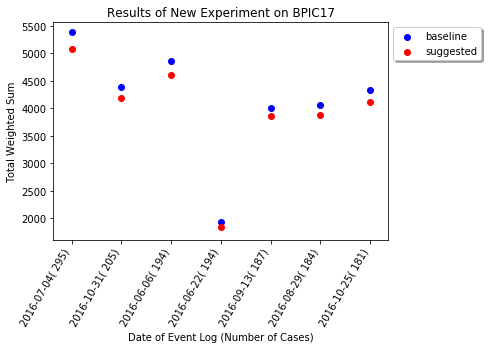

In [345]:
# plot baseline_real and suggested_real in a scatter plot with the x-axis being test path and the y-axis being total_weighted_sum
plt.figure()
plt.title('Results of New Experiment on BPIC17')
plt.scatter(baseline_new_real['date'], baseline_new_real[' total_weighted_sum'], label='baseline', color='blue')
plt.scatter(suggested_new_real['date'], suggested_new_real[' total_weighted_sum'], label='suggested', color='red')
plt.xlabel('Date of Event Log (Number of Cases)')
plt.ylabel('Total Weighted Sum')
# rotate the xticks by 90 degrees
plt.xticks(rotation=60)
# shift xticks labels to the left by 0.5
plt.xticks(np.arange(len(baseline_new_real['date'])), baseline_new_real['date_case'], ha='right')
plt.legend(shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'real', 'scatterplot_new.png'))
plt.show()

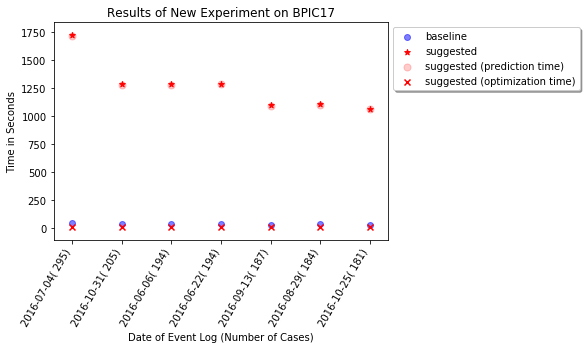

In [346]:
# plot baseline_real and suggested_real in a scatter plot with the x-axis being test path and the y-axis being time 
plt.figure()
plt.title('Results of New Experiment on BPIC17')
plt.scatter(baseline_new_real['date'], baseline_new_real[' total_computation_time '], label='baseline', color='blue', alpha=0.5)
plt.scatter(suggested_new_real['date'], suggested_new_real[' total_computation_time'], label='suggested', color='red', marker='*')
plt.scatter(suggested_new_real['date'], suggested_new_real[' total_pred_time'], label='suggested (prediction time)', color='red', marker='o', s=50, alpha=0.2)
plt.scatter(suggested_new_real['date'], suggested_new_real[' total_opti_time'], label='suggested (optimization time)', color='red', marker='x')

plt.xlabel('Date of Event Log (Number of Cases)')
plt.ylabel('Time in Seconds')
# rotate the xticks by 90 degrees
plt.xticks(rotation=60)
# shift xticks labels to the left by 0.5
plt.xticks(np.arange(len(baseline_new_real['date'])), baseline_new_real['date_case'], ha='right')
plt.legend(shadow=True, fancybox=True, loc='upper left', bbox_to_anchor=(1, 1))
# save whole figure

plt.savefig(os.path.join(project_root, 'plots', 'boxplots', 'real', 'scatterplot_new_time.png'))
plt.show()